# Data Analysis

### SEN9120: Advanced Agent Based Modeling
Cruz Torres Francesco, 4999959
<br> Herzog Rico, 5095530

In [7]:
# Import necessary scintific computing, data analysis and visualization packages
%matplotlib inline
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

In [11]:
for name in sorted(os.listdir("./results")):
    print(name)

outcomes2021-2-6-20-18.csv
outcomes2021-2-6-21-00.csv
outcomes2021-2-7-0-32_50 samples.csv
outcomes2021-2-9-3-42_150 samples.csv
outcomes2021-2-9-7-27_150 samples.csv
parameters2021-2-6-20-18.csv
parameters2021-2-6-21-00.csv
parameters2021-2-7-0-32_50 samples.csv
parameters2021-2-9-3-42_150 samples.csv
parameters2021-2-9-7-27_150 samples.csv


In [12]:
#access all results files and store them in dataframes

count_outcomes = 1
count_parameters = 1

for name in sorted(os.listdir("./results")):
    path = os.path.join("./results", name)
        
    if "outcomes" in name:
        globals()["outcomes_"+str(count_outcomes)] = pd.read_csv(path)
        count_outcomes += 1
        
    #othwerwise the filename starts with "parameters"
    else:
        globals()["parameters_"+str(count_parameters)] = pd.read_csv(path)
        count_parameters += 1

In [13]:
# for each couple of files (parameters ; outcome) merge the two files together
for i,j in zip(range(1,count_parameters), range(1,count_outcomes)):
    globals()["results_"+str(i)] = pd.merge(globals()["parameters_"+str(i)], globals()["outcomes_"+str(i)], left_on= "Unnamed: 0", right_on= "Run").drop("Unnamed: 0", axis=1)

In [14]:
# adjust the "Run" column such that each run is unique across all results files
results_2["Run"] = results_2["Run"] + results_1["Run"].iloc[-1] + 1
results_3["Run"] = results_3["Run"] + results_2["Run"].iloc[-1] + 1
results_4["Run"] = results_4["Run"] + results_3["Run"].iloc[-1] + 1
results_5["Run"] = results_5["Run"] + results_4["Run"].iloc[-1] + 1
results_5["Run"]

0        220
1        220
2        220
3        220
4        220
        ... 
14995    369
14996    369
14997    369
14998    369
14999    369
Name: Run, Length: 15000, dtype: int64

In [15]:
# combine all results dataframes into one dataframe, where Run is the unique key column
results = pd.concat([results_1, results_2, results_3, results_4, results_5], axis = 0, )
results

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Run,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban
0,8.0,8.0,15.0,1.0,4.0,1.0,True,0,0,40.0,325.0,166.5
1,8.0,8.0,15.0,1.0,4.0,1.0,True,0,1,60.0,179.0,159.0
2,8.0,8.0,15.0,1.0,4.0,1.0,True,0,2,64.0,90.0,145.5
3,8.0,8.0,15.0,1.0,4.0,1.0,True,0,3,48.0,178.0,147.0
4,8.0,8.0,15.0,1.0,4.0,1.0,True,0,4,50.0,385.0,172.5
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,95,100.0,521.0,448.5
14996,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,96,130.0,477.0,420.0
14997,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,97,144.0,464.0,391.5
14998,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,98,130.0,444.0,429.0


In [22]:
avg_results = results.groupby("Run").mean()
avg_results["MW_Total"] = avg_results.iloc[:, -3:].sum(axis=1)
avg_results.dtypes

administrative-network-meetings     float64
total-project-proposal-frequency    float64
informal-meetings-frequency         float64
green-energy-openness-change        float64
political-variety-change            float64
max-project-capacity                float64
random-intial-trust                    bool
Random Seed                         float64
MW_implemented_wind                 float64
MW_implemented_solar                float64
MW_implemented_urban                float64
MW_Total                            float64
dtype: object

Text(0, 0.5, 'Frequency of administrative \nnetwork meetings \n[1/year]')

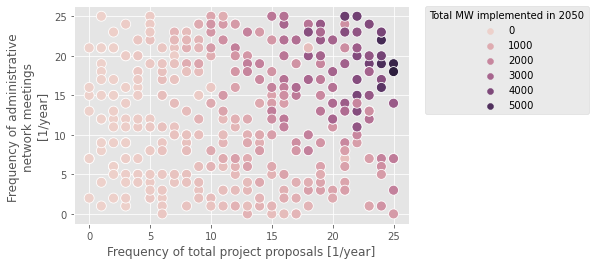

In [52]:


sns.scatterplot(x=avg_results["total-project-proposal-frequency"], y=avg_results["administrative-network-meetings"], hue=avg_results["MW_Total"], s= 100, )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Total MW implemented in 2050")
plt.title('')
# Set x-axis label
plt.xlabel('Frequency of total project proposals [1/year]')
# Set y-axis label
plt.ylabel('Frequency of administrative \nnetwork meetings \n[1/year]')

In [ ]:
sns.scatterplot(x=avg_results["total-project-proposal-frequency"], y=avg_results["max-project-capacity"], hue=avg_results["MW_Total"], s= 100, )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Total MW implemented in 2050")
plt.title('')
# Set x-axis label
plt.xlabel('Frequency of total project proposals [1/year]')
# Set y-axis label
plt.ylabel('Maximum project capacity of municipalities \n[1/10,000 inhabitants]')